## Load Libraries

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data



In [25]:
raw_csv_data = pd.read_excel("/content/drive/MyDrive/Index3 excel.xlsx",header=2)
df_comp=raw_csv_data.copy()

df_comp.head()

,Date,Close
0,2021-01-04,44703.00
1,2021-01-05,44908.12
2,2021-01-06,45587.16
3,2021-01-07,46188.66
4,2021-01-08,46729.30


### Format the Data

In [26]:
df_comp.columns = ['ds','y']

In [27]:
df_comp['ds'] = pd.to_datetime(df_comp['ds'])

df_comp.head()

,ds,y
0,2021-01-04,44703.00
1,2021-01-05,44908.12
2,2021-01-06,45587.16
3,2021-01-07,46188.66
4,2021-01-08,46729.30


## Create and Fit Model

In [28]:
m = Prophet()
m.fit(df_comp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [30]:
future = m.make_future_dataframe(periods=5, include_history= True)

In [32]:
future.head()

,ds
0,2021-01-04
1,2021-01-05
2,2021-01-06
3,2021-01-07
4,2021-01-08


In [33]:
df_comp.head()

,ds,y
0,2021-01-04,44703.00
1,2021-01-05,44908.12
2,2021-01-06,45587.16
3,2021-01-07,46188.66
4,2021-01-08,46729.30


In [34]:
df_comp.tail()

,ds,y
200,2021-10-18,52686.03
201,2021-10-19,52402.73
202,2021-10-20,52298.20
203,2021-10-21,52020.05
204,2021-10-22,51889.66


In [35]:
future.tail()

,ds
205,2021-10-23
206,2021-10-24
207,2021-10-25
208,2021-10-26
209,2021-10-27



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [36]:
forecast = m.predict(future)

In [37]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,45686.557765,45223.044441,46625.556308,45686.557765,45686.557765,225.699340,225.699340,225.699340,225.699340,225.699340,225.699340,0.0,0.0,0.0,45912.257105
1,2021-01-05,45636.275911,45126.893512,46602.844719,45636.275911,45636.275911,226.886005,226.886005,226.886005,226.886005,226.886005,226.886005,0.0,0.0,0.0,45863.161917
2,2021-01-06,45585.994058,45093.702026,46515.292530,45585.994058,45585.994058,206.324180,206.324180,206.324180,206.324180,206.324180,206.324180,0.0,0.0,0.0,45792.318238
3,2021-01-07,45535.712205,45067.108154,46419.039441,45535.712205,45535.712205,217.267533,217.267533,217.267533,217.267533,217.267533,217.267533,0.0,0.0,0.0,45752.979738
4,2021-01-08,45485.430352,44973.570087,46400.602073,45485.430352,45485.430352,191.779980,191.779980,191.779980,191.779980,191.779980,191.779980,0.0,0.0,0.0,45677.210332


In [38]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
205,2021-10-23,51412.478834,50180.848415,51524.376897,51412.478834,51412.478834,-533.978518,-533.978518,-533.978518,-533.978518,-533.978518,-533.978518,0.0,0.0,0.0,50878.500315
206,2021-10-24,51409.752989,50192.655497,51586.629117,51409.752989,51409.752989,-533.978520,-533.978520,-533.978520,-533.978520,-533.978520,-533.978520,0.0,0.0,0.0,50875.774469
207,2021-10-25,51407.027144,50956.967848,52376.269494,51405.525532,51409.153445,225.699340,225.699340,225.699340,225.699340,225.699340,225.699340,0.0,0.0,0.0,51632.726484
208,2021-10-26,51404.301299,50927.896069,52330.241309,51397.550499,51411.156230,226.886005,226.886005,226.886005,226.886005,226.886005,226.886005,0.0,0.0,0.0,51631.187304
209,2021-10-27,51401.575454,50954.762128,52328.194201,51388.065979,51415.544022,206.324180,206.324180,206.324180,206.324180,206.324180,206.324180,0.0,0.0,0.0,51607.899634


In [39]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [40]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
198,2021-10-14,51654.278970,50968.240274,52396.478207
199,2021-10-15,51626.065572,50936.144191,52359.109371
200,2021-10-18,51651.807398,50961.634118,52325.077645
201,2021-10-19,51650.268218,50883.410536,52384.148269
202,2021-10-20,51626.980548,50936.108465,52315.128410
203,2021-10-21,51635.198056,50917.016886,52340.967493
204,2021-10-22,51606.984658,50915.283548,52353.763542
205,2021-10-23,50878.500315,50180.848415,51524.376897
206,2021-10-24,50875.774469,50192.655497,51586.629117
207,2021-10-25,51632.726484,50956.967848,52376.269494


### Graficando los pronósticos


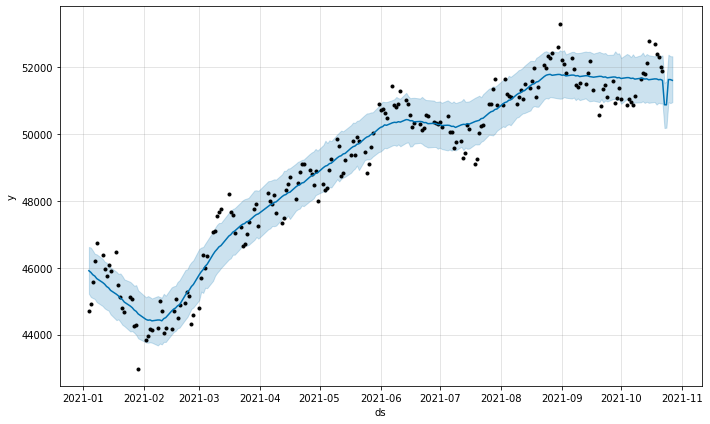

In [41]:
m.plot(forecast);

In [42]:
pd.plotting.register_matplotlib_converters()

(737794.0, 738090.0)

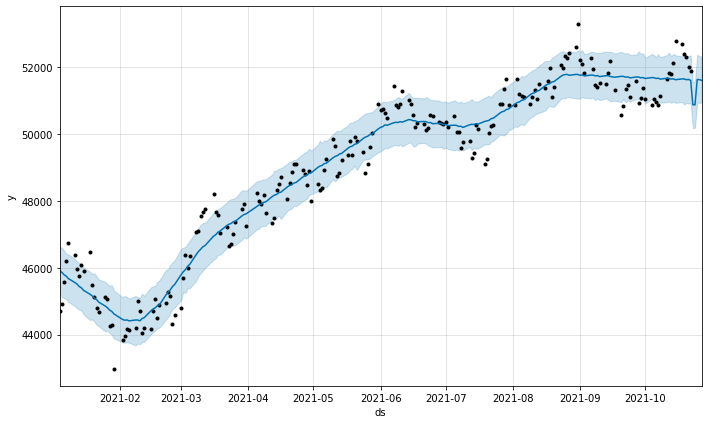

In [46]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2021-01-04','2021-10-27')

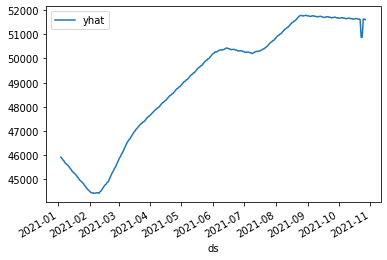

In [47]:
forecast.plot(x='ds',y='yhat')

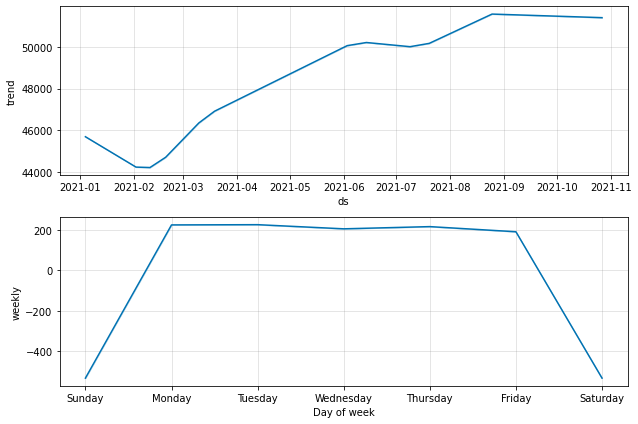

In [48]:
m.plot_components(forecast);
